In [192]:
#Predictive Maintanence 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('../dataset/predictive_maintenance_dataset.csv', parse_dates=True)
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [57]:
df.tail()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,11/2/2015,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,70000


In [58]:
df.shape

(124494, 12)

In [59]:
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


In [60]:
df['failure'].unique()

array([0, 1], dtype=int64)

In [61]:
len(df['device'].unique())

1169

In [62]:
df[df['date']=='1/1/2015']

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1158,1/1/2015,Z1F1VMZB,0,45340272,0,0,0,5,186491,0,0,0
1159,1/1/2015,Z1F1VQFY,0,16736808,0,0,0,6,224020,0,0,0
1160,1/1/2015,Z1F26YZB,0,193902776,0,1,0,1,271646,0,0,0
1161,1/1/2015,Z1F282ZV,0,161799176,0,1,0,1,171608,0,0,0


In [63]:
df['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [64]:
df[df.duplicated()]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
101335,7/10/2015,S1F0R4Q8,0,192721392,0,0,0,8,213700,0,0,0


In [65]:
df = df.drop_duplicates()
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [66]:
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [67]:
df.isna().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [68]:
len(df['device'].unique())

1169

In [69]:
len(df[df['failure']==1])

106

In [70]:
df.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       560
metric3        48
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        67
dtype: int64

In [71]:
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124493.000000,1.244930e+05,124493.000000,124493.000000,124493.000000,124493.000000,124493.000000,124493.000000,124493.000000,124493.000000
mean,0.000851,1.223875e+08,159.493988,9.940977,1.741134,14.222719,260173.031022,0.292531,0.292531,13.013953
std,0.029167,7.045934e+07,2179.686488,185.748875,22.908598,15.943082,99151.389285,7.436954,7.436954,275.662324
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128346e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227971e+08,0.000000,0.000000,0.000000,10.000000,249800.000000,0.000000,0.000000,0.000000
75%,0.000000,1.833091e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124493 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124493 non-null  object
 1   device   124493 non-null  object
 2   failure  124493 non-null  int64 
 3   metric1  124493 non-null  int64 
 4   metric2  124493 non-null  int64 
 5   metric3  124493 non-null  int64 
 6   metric4  124493 non-null  int64 
 7   metric5  124493 non-null  int64 
 8   metric6  124493 non-null  int64 
 9   metric7  124493 non-null  int64 
 10  metric8  124493 non-null  int64 
 11  metric9  124493 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 12.3+ MB


In [73]:
df['date'][0]

'1/1/2015'

In [74]:
df['date'] = pd.to_datetime(df['date'])

df['activedays'] = df['date'] - df['date'][0]

df['month'] = df['date'].dt.month

df['weekday'] = df['date'].dt.weekday
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,weekday
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0 days,1,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,305 days,11,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,305 days,11,0
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,305 days,11,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,305 days,11,0


In [75]:
df['weekday'] = df['weekday'].replace(0,7)
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,weekday
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0 days,1,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,305 days,11,7
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,305 days,11,7
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,305 days,11,7
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,305 days,11,7


In [76]:
df.groupby('month').agg({'device':lambda x: x.nunique()})

,device
month,
1,1164
2,726
3,685
4,491
5,424
6,353
7,346
8,334
9,184


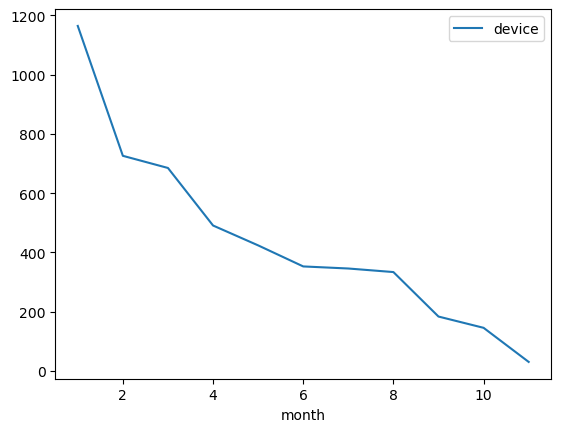

In [77]:
df.groupby('month').agg({'device':lambda x: x.nunique()}).plot()
plt.show()

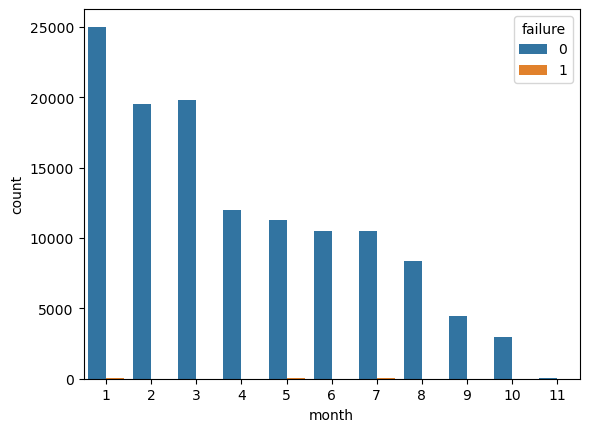

In [78]:
sns.countplot(x='month', hue='failure', data=df)
plt.show()

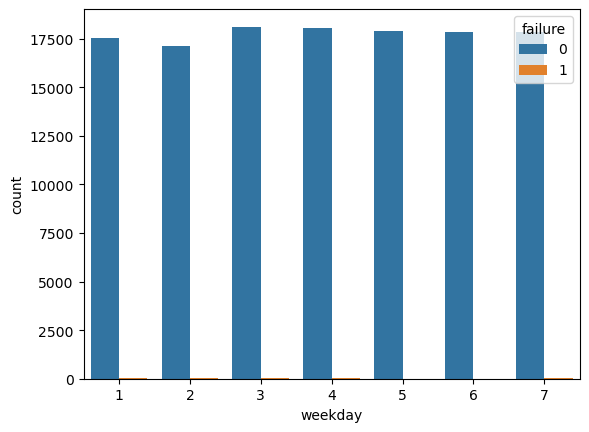

In [79]:
sns.countplot(x='weekday', hue='failure', data=df)
plt.show()

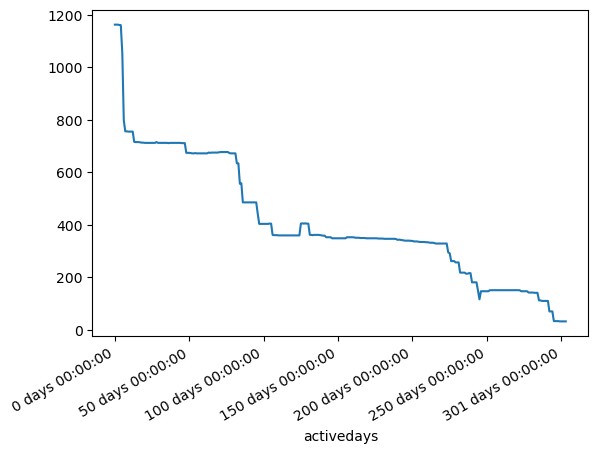

In [80]:
df.groupby('activedays')['device'].count().plot()
plt.show()

In [81]:
df_date = df.groupby('device').agg({'date' : 'max'})
df_date

,date
device,
S1F01085,2015-01-06
S1F013BB,2015-05-11
S1F0166B,2015-01-06
S1F01E6Y,2015-02-17
S1F01JE0,2015-01-06
...,...
Z1F1VMZB,2015-10-19
Z1F1VQFY,2015-06-30
Z1F26YZB,2015-03-25


In [82]:
max(df['date'])

Timestamp('2015-11-02 00:00:00')

In [83]:
min(df['date'])

Timestamp('2015-01-01 00:00:00')

In [84]:
df_date['date'].to_dict()

{'S1F01085': Timestamp('2015-01-06 00:00:00'),
 'S1F013BB': Timestamp('2015-05-11 00:00:00'),
 'S1F0166B': Timestamp('2015-01-06 00:00:00'),
 'S1F01E6Y': Timestamp('2015-02-17 00:00:00'),
 'S1F01JE0': Timestamp('2015-01-06 00:00:00'),
 'S1F01R2B': Timestamp('2015-08-24 00:00:00'),
 'S1F01TD5': Timestamp('2015-01-06 00:00:00'),
 'S1F01XDJ': Timestamp('2015-04-16 00:00:00'),
 'S1F023H2': Timestamp('2015-01-19 00:00:00'),
 'S1F02A0J': Timestamp('2015-08-28 00:00:00'),
 'S1F02DZ2': Timestamp('2015-01-06 00:00:00'),
 'S1F02EVN': Timestamp('2015-01-06 00:00:00'),
 'S1F02L38': Timestamp('2015-03-27 00:00:00'),
 'S1F02MGA': Timestamp('2015-01-06 00:00:00'),
 'S1F02P76': Timestamp('2015-01-06 00:00:00'),
 'S1F02VAX': Timestamp('2015-01-06 00:00:00'),
 'S1F02W1L': Timestamp('2015-05-11 00:00:00'),
 'S1F02WFT': Timestamp('2015-01-06 00:00:00'),
 'S1F02XLX': Timestamp('2015-05-11 00:00:00'),
 'S1F0318A': Timestamp('2015-01-06 00:00:00'),
 'S1F0322R': Timestamp('2015-01-06 00:00:00'),
 'S1F0330P': 

In [85]:
df_failure = df.loc[df['failure'] == 1, ['device', 'date']]
df_failure

,device,date
4885,S1F0RRB1,2015-01-05
6879,S1F0CTDN,2015-01-07
8823,W1F0PNA5,2015-01-09
11957,W1F13SRV,2015-01-13
12668,W1F1230J,2015-01-14
...,...,...
109927,W1F1CB5E,2015-08-04
114251,Z1F0MRPJ,2015-08-18
122118,S1F0JGJV,2015-10-05
122808,Z1F14BGY,2015-10-09


In [86]:
df_good = df.loc[df['failure']==0, ['device', 'date']]
df_good

,device,date
0,S1F01085,2015-01-01
1,S1F0166B,2015-01-01
2,S1F01E6Y,2015-01-01
3,S1F01JE0,2015-01-01
4,S1F01R2B,2015-01-01
...,...,...
124489,Z1F0MA1S,2015-11-02
124490,Z1F0Q8RT,2015-11-02
124491,Z1F0QK05,2015-11-02
124492,Z1F0QL3N,2015-11-02


In [87]:
df_date.shape, df_failure.shape

((1169, 1), (106, 2))

In [88]:
df['max_date'] = df.device.map(df_date.date.to_dict())
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,weekday,max_date
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0 days,1,3,2015-01-06
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3,2015-01-06
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3,2015-02-17
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3,2015-01-06
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3,2015-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,305 days,11,7,2015-11-02
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,305 days,11,7,2015-11-02
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,305 days,11,7,2015-11-02
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,305 days,11,7,2015-11-02


In [89]:
dff = df[(df['failure'] == 1) & (df['date'] != df['max_date'])]
dff

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,weekday,max_date
77958,2015-05-05,S1F136J0,1,131519808,0,0,25,16,343464,8,8,0,124 days,5,1,2015-05-06
79590,2015-05-09,W1F0KCP2,1,176861128,10392,0,121,6,310699,0,0,0,128 days,5,5,2015-05-11
79601,2015-05-09,W1F0M35B,1,141805096,0,0,1,7,267203,0,0,0,128 days,5,5,2015-05-11
101999,2015-07-12,S1F0GPFZ,1,236544080,0,0,0,9,264594,0,0,0,192 days,7,6,2015-07-24
104223,2015-07-18,W1F11ZG9,1,32671632,368,9,486,3,344433,0,0,1,198 days,7,5,2015-08-17


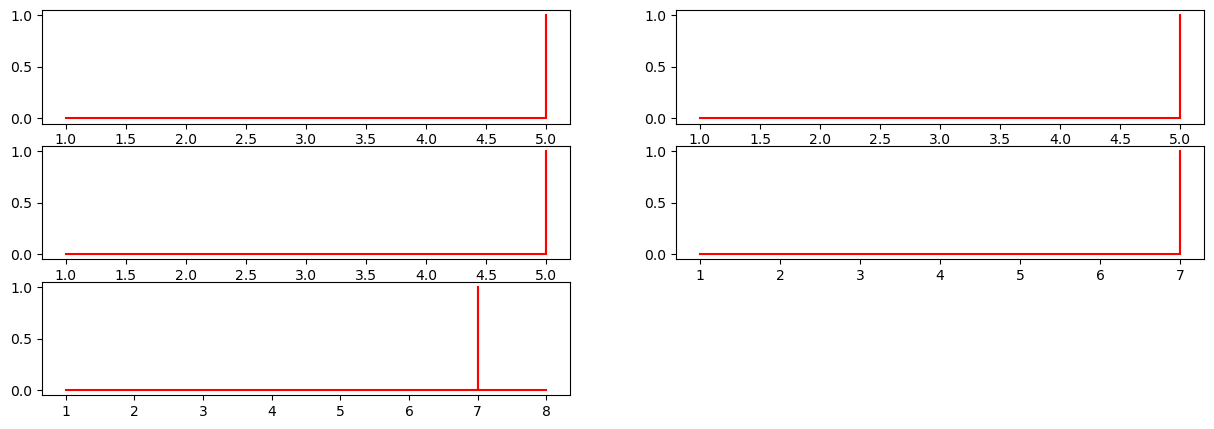

In [90]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(3,2,1)
plt.plot(df.loc[df['device']=='S1F136J0', ['failure', 'month']]['month'], df.loc[df['device']=='S1F136J0',['failure', 'month']]['failure'], color = 'red')
fig.add_subplot(3,2,2)
plt.plot(df.loc[df['device']=='W1F0KCP2', ['failure', 'month']]['month'], df.loc[df['device']=='W1F0KCP2',['failure', 'month']]['failure'], color = 'red')
fig.add_subplot(3,2,3)
plt.plot(df.loc[df['device']=='W1F0M35B', ['failure', 'month']]['month'], df.loc[df['device']=='W1F0M35B',['failure', 'month']]['failure'], color = 'red')
fig.add_subplot(3,2,4)
plt.plot(df.loc[df['device']=='S1F0GPFZ', ['failure', 'month']]['month'], df.loc[df['device']=='S1F0GPFZ',['failure', 'month']]['failure'], color = 'red')
fig.add_subplot(3,2,5)
plt.plot(df.loc[df['device']=='W1F11ZG9', ['failure', 'month']]['month'], df.loc[df['device']=='W1F11ZG9',['failure', 'month']]['failure'], color = 'red')


In [91]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,weekday,max_date
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0 days,1,3,2015-01-06
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3,2015-01-06
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3,2015-02-17
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3,2015-01-06
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3,2015-08-24


In [92]:
df['metric1'].nunique()

123877

In [93]:
df1 = df.groupby('device').agg({'date':'max'})
df1.shape

(1169, 1)

In [94]:
df1

,date
device,
S1F01085,2015-01-06
S1F013BB,2015-05-11
S1F0166B,2015-01-06
S1F01E6Y,2015-02-17
S1F01JE0,2015-01-06
...,...
Z1F1VMZB,2015-10-19
Z1F1VQFY,2015-06-30
Z1F26YZB,2015-03-25


In [95]:
df1 = df1.reset_index()
df = df.reset_index(drop=True)
df2 = pd.merge(df1, df, how='left', on=['device', 'date'])
df2.shape

(1169, 16)

In [96]:
df2

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,weekday,max_date
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1,2015-01-06
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7,2015-05-11
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1,2015-01-06
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1,2015-02-17
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1,2015-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,Z1F1VMZB,2015-10-19,0,96949360,0,0,0,5,263507,0,0,0,291 days,10,7,2015-10-19
1165,Z1F1VQFY,2015-06-30,1,178051496,0,0,0,7,265316,0,0,0,180 days,6,1,2015-06-30
1166,Z1F26YZB,2015-03-25,0,229065488,0,1,0,1,292052,0,0,0,83 days,3,2,2015-03-25
1167,Z1F282ZV,2015-03-25,0,72717600,0,1,0,1,192919,0,0,0,83 days,3,2,2015-03-25


In [97]:
df2['failure_before'] = 0

In [98]:
df2.head()

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,weekday,max_date,failure_before
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1,2015-01-06,0
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7,2015-05-11,0
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1,2015-01-06,0
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1,2015-02-17,0
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1,2015-01-06,0


In [99]:
df2.loc[df2['device'] == 'S1F136J0', 'failure_before'] = 1
df2.loc[df2['device'] == 'W1F0KCP2', 'failure_before'] = 1
df2.loc[df2['device'] == 'W1F0M35B', 'failure_before'] = 1
df2.loc[df2['device'] == 'S1F0GPFZ', 'failure_before'] = 1
df2.loc[df2['device'] == 'W1F11ZG9', 'failure_before'] = 1

In [100]:
df2['device']

0       S1F01085
1       S1F013BB
2       S1F0166B
3       S1F01E6Y
4       S1F01JE0
          ...   
1164    Z1F1VMZB
1165    Z1F1VQFY
1166    Z1F26YZB
1167    Z1F282ZV
1168    Z1F2PBHX
Name: device, Length: 1169, dtype: object

In [101]:
Id = df2['device'].values.tolist()

In [102]:
Id1 = []
for i in Id:
    i = i[:4]
    Id1.append(i)

df2.device = Id1
df2['device'].value_counts()

device
S1F0    391
W1F0    282
Z1F0    149
S1F1    139
W1F1    138
Z1F1     67
Z1F2      3
Name: count, dtype: int64

In [103]:
dev = pd.crosstab(df2['device'], df2['failure'])

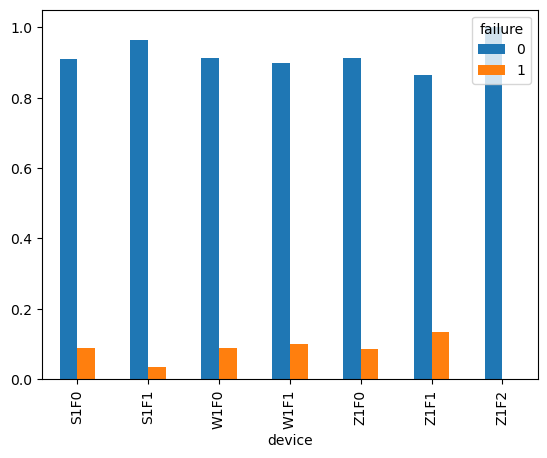

In [104]:
dev.div(dev.sum(1).astype(float), axis=0).plot(kind='bar')
plt.show()

In [105]:
df2

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,weekday,max_date,failure_before
0,S1F0,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1,2015-01-06,0
1,S1F0,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7,2015-05-11,0
2,S1F0,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1,2015-01-06,0
3,S1F0,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1,2015-02-17,0
4,S1F0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1,2015-01-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,Z1F1,2015-10-19,0,96949360,0,0,0,5,263507,0,0,0,291 days,10,7,2015-10-19,0
1165,Z1F1,2015-06-30,1,178051496,0,0,0,7,265316,0,0,0,180 days,6,1,2015-06-30,0
1166,Z1F2,2015-03-25,0,229065488,0,1,0,1,292052,0,0,0,83 days,3,2,2015-03-25,0
1167,Z1F2,2015-03-25,0,72717600,0,1,0,1,192919,0,0,0,83 days,3,2,2015-03-25,0


In [106]:
df2.nunique()

device               7
date               104
failure              2
metric1           1168
metric2            118
metric3             44
metric4             67
metric5             58
metric6           1135
metric7             22
metric8             22
metric9             64
activedays         104
month               11
weekday              7
max_date           104
failure_before       2
dtype: int64

In [107]:
cat_ftrs = ['metric3', 'metric4', 'metric5', 'metric7', 'metric9']
for col in cat_ftrs:
    df2[col] = df2[col].astype('object')

In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   device          1169 non-null   object         
 1   date            1169 non-null   datetime64[ns] 
 2   failure         1169 non-null   int64          
 3   metric1         1169 non-null   int64          
 4   metric2         1169 non-null   int64          
 5   metric3         1169 non-null   object         
 6   metric4         1169 non-null   object         
 7   metric5         1169 non-null   object         
 8   metric6         1169 non-null   int64          
 9   metric7         1169 non-null   object         
 10  metric8         1169 non-null   int64          
 11  metric9         1169 non-null   object         
 12  activedays      1169 non-null   timedelta64[ns]
 13  month           1169 non-null   int32          
 14  weekday         1169 non-null   int32   

In [110]:
def str_to_num(str):
    return str.split(' ')[0]

df2['activedays'] = df2['activedays'].astype('str')

df2['activedays'] = df2['activedays'].apply(str_to_num)
df2['activedays'] = df2['activedays'].astype('int')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   int64         
 4   metric2         1169 non-null   int64         
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   int64         
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   int32         
 14  weekday         1169 non-null   int32         
 15  max_

In [111]:
for col in ['month', 'weekday']:
    df2[col] = df2[col].astype('object')

In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   int64         
 4   metric2         1169 non-null   int64         
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   int64         
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   object        
 14  weekday         1169 non-null   object        
 15  max_

In [114]:
df2.head()

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,weekday,max_date,failure_before
0,S1F0,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5,1,1,2015-01-06,0
1,S1F0,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130,5,7,2015-05-11,0
2,S1F0,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5,1,1,2015-01-06,0
3,S1F0,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47,2,1,2015-02-17,0
4,S1F0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5,1,1,2015-01-06,0


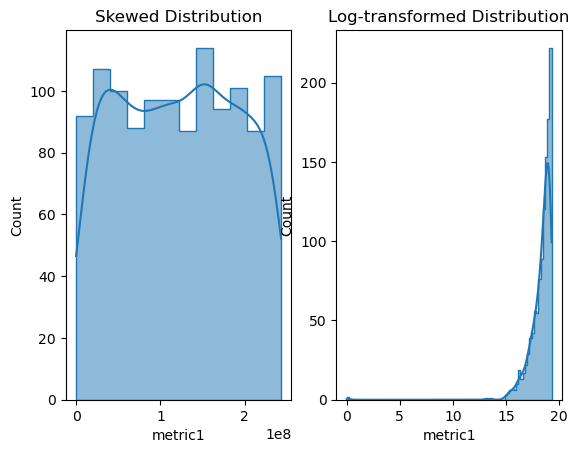

In [123]:
f, axarr  = plt.subplots(1,2)
sns.histplot(df2['metric1'], ax = axarr[0], kde=True, element='step')
axarr[0].set_title('Skewed Distribution')
sns.histplot(np.log(1+df2['metric1']), ax = axarr[1], kde=True, element='step')
axarr[1].set_title('Log-transformed Distribution')
plt.show()

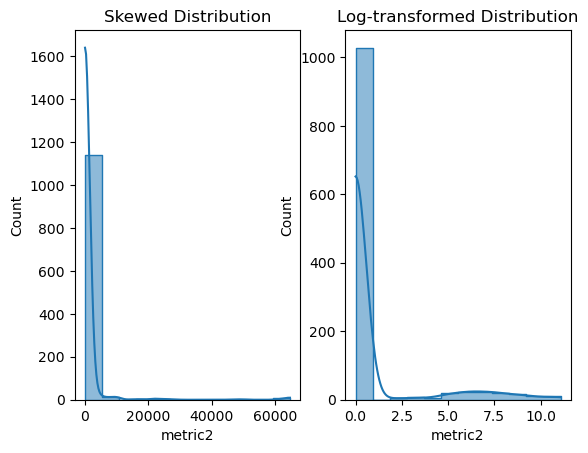

In [129]:
f, axarr  = plt.subplots(1,2)
sns.histplot(df2['metric2'], ax = axarr[0], kde=True, element='step')
axarr[0].set_title('Skewed Distribution')
sns.histplot(np.log(1+df2['metric2']), ax = axarr[1], kde=True, element='step')
axarr[1].set_title('Log-transformed Distribution')
plt.show()

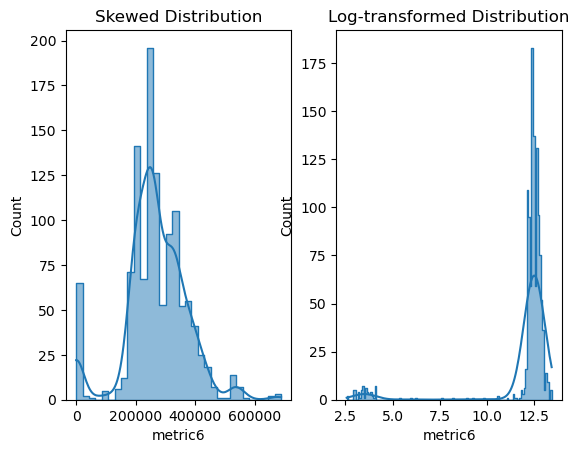

In [130]:
f, axarr  = plt.subplots(1,2)
sns.histplot(df2['metric6'], ax = axarr[0], kde=True, element='step')
axarr[0].set_title('Skewed Distribution')
sns.histplot(np.log(1+df2['metric6']), ax = axarr[1], kde=True, element='step')
axarr[1].set_title('Log-transformed Distribution')
plt.show()

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_ftrs = ['metric1', 'metric2', 'metric6']
df2[num_ftrs] = scaler.fit_transform(df2[num_ftrs])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   float64       
 4   metric2         1169 non-null   float64       
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   float64       
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   object        
 14  weekday         1169 non-null   object        
 15  max_

d:\predictive-maintanence\.conda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


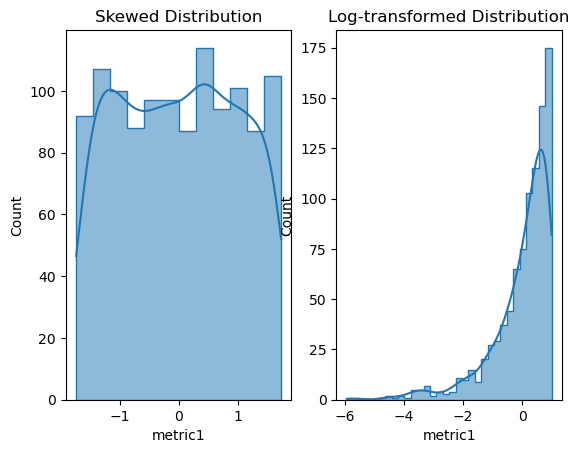

In [132]:
f, axarr  = plt.subplots(1,2)
sns.histplot(df2['metric1'], ax = axarr[0], kde=True, element='step')
axarr[0].set_title('Skewed Distribution')
sns.histplot(np.log(1+df2['metric1']), ax = axarr[1], kde=True, element='step')
axarr[1].set_title('Log-transformed Distribution')
plt.show()

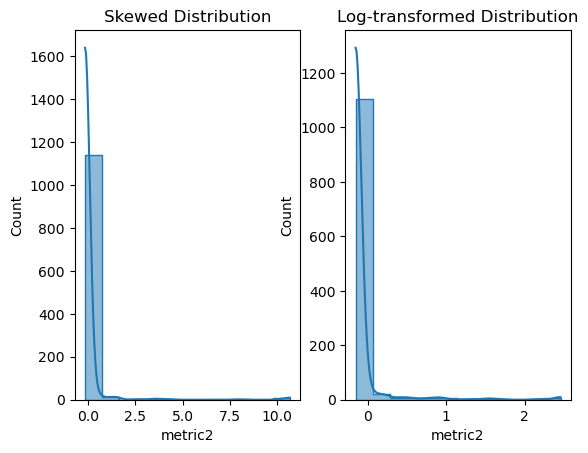

In [133]:
f, axarr  = plt.subplots(1,2)
sns.histplot(df2['metric2'], ax = axarr[0], kde=True, element='step')
axarr[0].set_title('Skewed Distribution')
sns.histplot(np.log(1+df2['metric2']), ax = axarr[1], kde=True, element='step')
axarr[1].set_title('Log-transformed Distribution')
plt.show()

d:\predictive-maintanence\.conda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


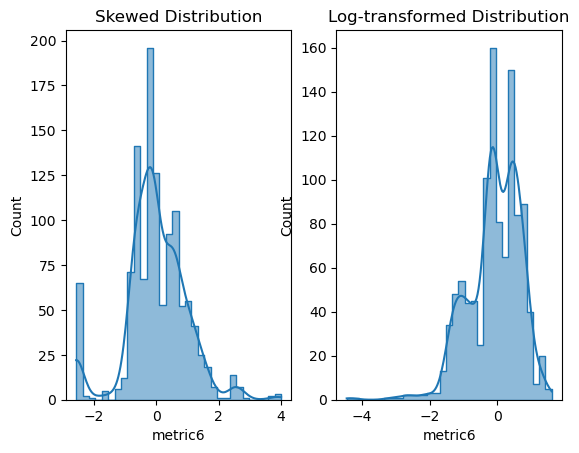

In [135]:
f, axarr  = plt.subplots(1,2)
sns.histplot(df2['metric6'], ax = axarr[0], kde=True, element='step')
axarr[0].set_title('Skewed Distribution')
sns.histplot(np.log(1+df2['metric6']), ax = axarr[1], kde=True, element='step')
axarr[1].set_title('Log-transformed Distribution')
plt.show()

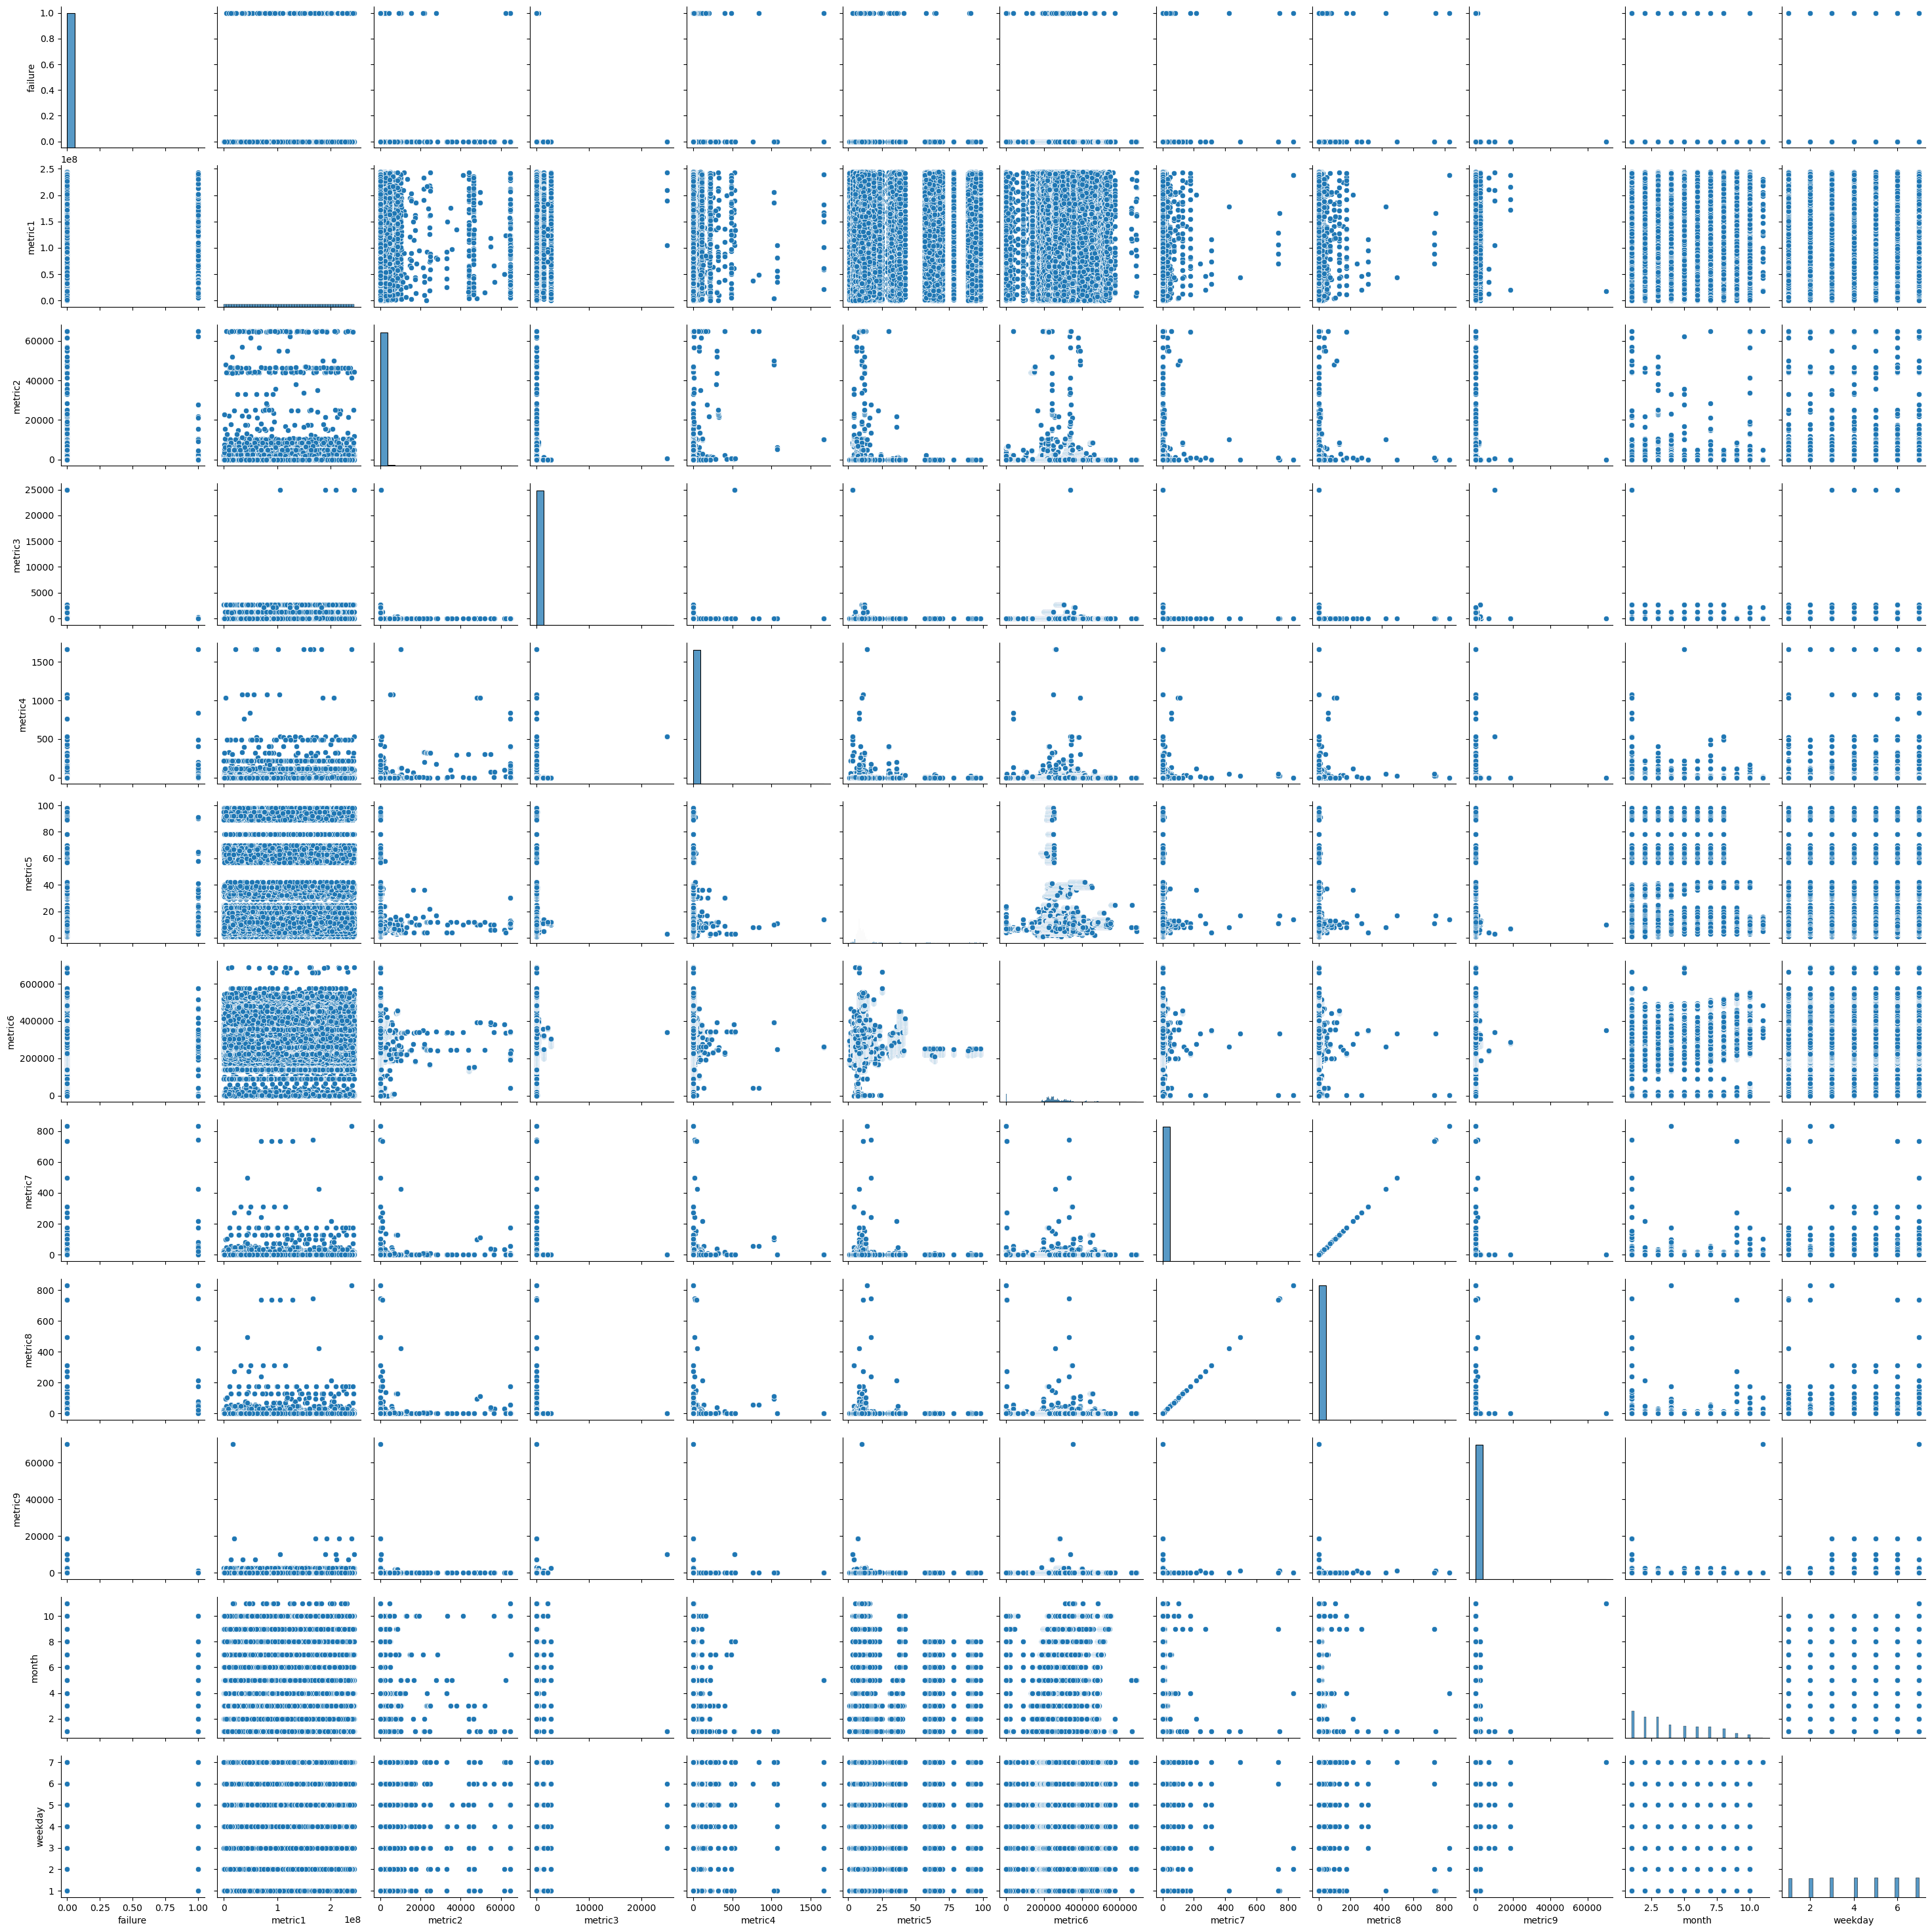

In [136]:
sns.pairplot(df)
plt.show()

In [137]:
(df['metric7']==df['metric8']).value_counts()

True    124493
Name: count, dtype: int64

In [138]:
df.drop('metric8', axis=1, inplace=True)

In [139]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,activedays,month,weekday,max_date
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,7,0 days,1,3,2015-01-06
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0 days,1,3,2015-01-06
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0 days,1,3,2015-02-17
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0 days,1,3,2015-01-06
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,0 days,1,3,2015-08-24


In [140]:
df2.head()

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,weekday,max_date,failure_before
0,S1F0,2015-01-06,0,0.094795,-0.136309,0,52,6,1.333502,0,0,7,5,1,1,2015-01-06,0
1,S1F0,2015-05-11,0,-0.092146,-0.145660,0,0,5,4.008798,0,0,0,130,5,7,2015-05-11,0
2,S1F0,2015-01-06,0,-1.630184,-0.145660,3,0,6,1.289341,0,0,0,5,1,1,2015-01-06,0
3,S1F0,2015-02-17,0,0.357937,-0.145660,0,0,12,-0.100105,0,0,0,47,2,1,2015-02-17,0
4,S1F0,2015-01-06,0,0.898989,-0.145660,0,0,6,1.359772,0,0,0,5,1,1,2015-01-06,0


In [141]:
df2.drop(['date', 'max_date'], axis=1, inplace=True)

In [142]:
df2.head()

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,weekday,failure_before
0,S1F0,0,0.094795,-0.136309,0,52,6,1.333502,0,0,7,5,1,1,0
1,S1F0,0,-0.092146,-0.145660,0,0,5,4.008798,0,0,0,130,5,7,0
2,S1F0,0,-1.630184,-0.145660,3,0,6,1.289341,0,0,0,5,1,1,0
3,S1F0,0,0.357937,-0.145660,0,0,12,-0.100105,0,0,0,47,2,1,0
4,S1F0,0,0.898989,-0.145660,0,0,6,1.359772,0,0,0,5,1,1,0


In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   device          1169 non-null   object 
 1   failure         1169 non-null   int64  
 2   metric1         1169 non-null   float64
 3   metric2         1169 non-null   float64
 4   metric3         1169 non-null   object 
 5   metric4         1169 non-null   object 
 6   metric5         1169 non-null   object 
 7   metric6         1169 non-null   float64
 8   metric7         1169 non-null   object 
 9   metric8         1169 non-null   int64  
 10  metric9         1169 non-null   object 
 11  activedays      1169 non-null   int32  
 12  month           1169 non-null   object 
 13  weekday         1169 non-null   object 
 14  failure_before  1169 non-null   int64  
dtypes: float64(3), int32(1), int64(3), object(8)
memory usage: 132.6+ KB


In [144]:
df2 = pd.get_dummies(df2, drop_first=True)

In [145]:
df2.head()

,failure,metric1,metric2,metric6,metric8,activedays,failure_before,device_S1F1,device_W1F0,device_W1F1,...,month_8,month_9,month_10,month_11,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,0,0.094795,-0.136309,1.333502,0,5,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,-0.092146,-0.145660,4.008798,0,130,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0,-1.630184,-0.145660,1.289341,0,5,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0.357937,-0.145660,-0.100105,0,47,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0.898989,-0.145660,1.359772,0,5,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [147]:
df2.shape

(1169, 279)

In [148]:
df2['failure'].value_counts()

failure
0    1068
1     101
Name: count, dtype: int64

In [149]:
#Feature Selection
X = df2.drop('failure', axis=1)
Y = df2['failure']

In [150]:
X

,metric1,metric2,metric6,metric8,activedays,failure_before,device_S1F1,device_W1F0,device_W1F1,device_Z1F0,...,month_8,month_9,month_10,month_11,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,0.094795,-0.136309,1.333502,0,5,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.092146,-0.145660,4.008798,0,130,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-1.630184,-0.145660,1.289341,0,5,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.357937,-0.145660,-0.100105,0,47,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.898989,-0.145660,1.359772,0,5,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,-0.358265,-0.145660,-0.061700,0,291,0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1165,0.794211,-0.145660,-0.044401,0,180,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1166,1.519129,-0.145660,0.211274,0,83,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1167,-0.702603,-0.145660,-0.736728,0,83,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [151]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1164    0
1165    1
1166    0
1167    0
1168    0
Name: failure, Length: 1169, dtype: int64

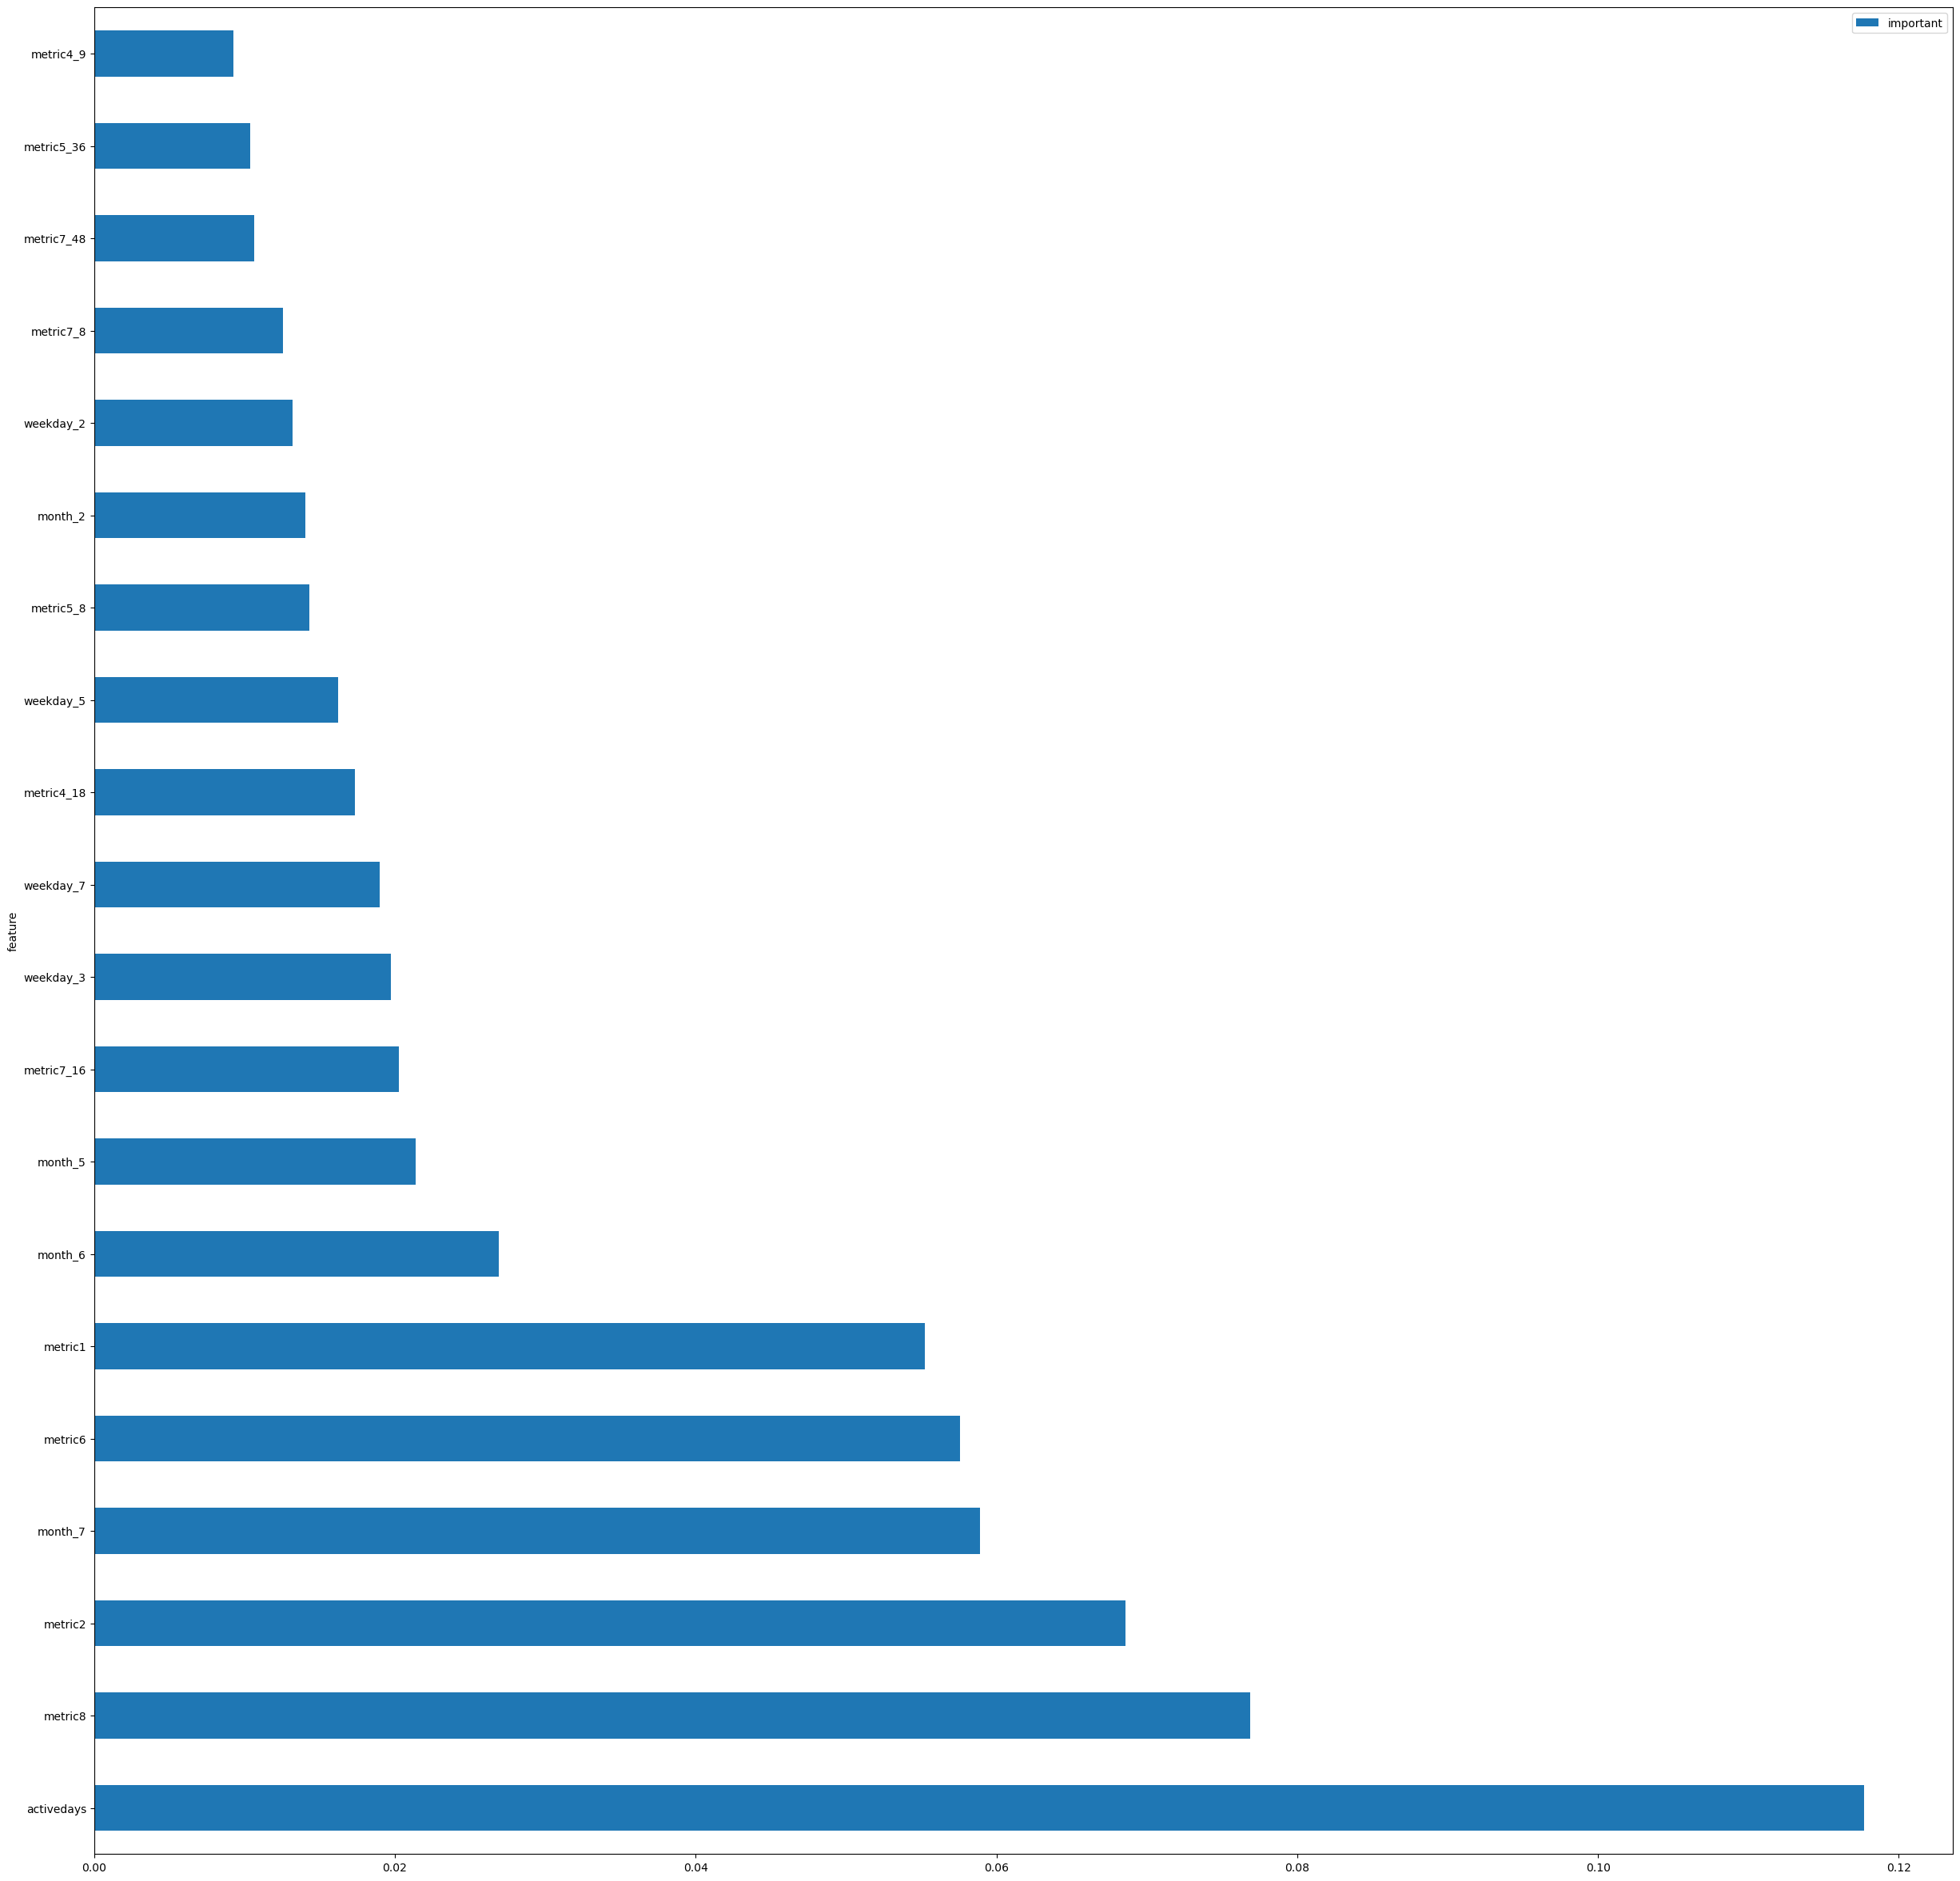

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X, Y)

features = pd.DataFrame()
features['feature'] = X.columns
features['important'] = clf.feature_importances_
features.sort_values(by=['important'], ascending= False, inplace=True)
features.set_index('feature', inplace=True)
features.iloc[:20, :].plot(kind='barh', figsize=(30,30))
plt.show()

In [155]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True)
x_reduced = model.transform(X)
print(x_reduced.shape)

(1169, 53)


d:\predictive-maintanence\.conda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [156]:
x_reduced = pd.DataFrame(x_reduced)
x_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.094795,-0.136309,1.333502,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.092146,-0.145660,4.008798,0.0,130.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.630184,-0.145660,1.289341,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.357937,-0.145660,-0.100105,0.0,47.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.898989,-0.145660,1.359772,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [159]:
lr.fit(X_train, Y_train)

d:\predictive-maintanence\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [160]:
predictions = lr.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy_score(Y_test, predictions)

0.9230769230769231

In [163]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       321
           1       0.71      0.17      0.27        30

    accuracy                           0.92       351
   macro avg       0.82      0.58      0.61       351
weighted avg       0.91      0.92      0.90       351



In [164]:
print(confusion_matrix(Y_test, predictions))

[[319   2]
 [ 25   5]]


In [165]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, Y_train)

LogisticRegression(solver='newton-cg')

In [166]:
predictions = lr.predict(X_test)

In [167]:
accuracy_score(Y_test, predictions)

0.9316239316239316

In [168]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       321
           1       0.88      0.23      0.37        30

    accuracy                           0.93       351
   macro avg       0.90      0.62      0.67       351
weighted avg       0.93      0.93      0.91       351



In [169]:
print(confusion_matrix(Y_test, predictions))

[[320   1]
 [ 23   7]]


In [171]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.9487179487179487


In [172]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       321
           1       0.80      0.53      0.64        30

    accuracy                           0.95       351
   macro avg       0.88      0.76      0.81       351
weighted avg       0.94      0.95      0.94       351



In [173]:
print(confusion_matrix(Y_test, predictions))

[[317   4]
 [ 14  16]]


In [175]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)

predictions = svc.predict(X_test)

accuracy_score(Y_test, predictions)

0.9173789173789174

In [196]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)

predictions = ada.predict(X_test)

accuracy_score(Y_test, predictions)


0.9458689458689459

In [197]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

predictions = gnb.predict(X_test)

accuracy_score(Y_test, predictions)

0.3418803418803419

In [179]:
gra = GradientBoostingClassifier()
gra.fit(X_train, Y_train)

predictions = gra.predict(X_test)

accuracy_score(Y_test, predictions)

0.9515669515669516

In [180]:
ex = ExtraTreesClassifier()
ex.fit(X_train, Y_train)

predictions = ex.predict(X_test)

accuracy_score(Y_test, predictions)

0.9316239316239316

In [186]:
hist = HistGradientBoostingClassifier()
hist.fit(X_train, Y_train)

predictions = hist.predict(X_test)

accuracy_score(Y_test, predictions)

0.9686609686609686

In [187]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       321
           1       0.88      0.73      0.80        30

    accuracy                           0.97       351
   macro avg       0.93      0.86      0.89       351
weighted avg       0.97      0.97      0.97       351



In [188]:
print(confusion_matrix(Y_test, predictions))

[[318   3]
 [  8  22]]


In [193]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

parameters = {'hidden_layer_sizes':[50, 100, 200],
              'alpha': [0.001, 0.01, 0.1], 
              'max_iter': [200, 500, 800], 
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

model = MLPClassifier()
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)
clf.fit(X_train, Y_train) # reduce the train set size to shorten the training time

print("The best parameter values found are:\n")
print(clf.best_params_)

# store the best model found in "bestmodel"
bestmodel = clf.best_estimator_

The best parameter values found are:

{'max_iter': 800, 'learning_rate_init': 0.001, 'hidden_layer_sizes': 200, 'alpha': 0.01}


In [195]:
mlp = MLPClassifier(max_iter=800, learning_rate_init=0.001, hidden_layer_sizes=200, alpha= 0.01)

mlp.fit(X_train, Y_train)
predictions = mlp.predict(X_test)

accuracy_score(Y_test, predictions)

0.9259259259259259

In [174]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

predictions = xgb.predict(X_test)

accuracy_score(Y_test, predictions)

0.9572649572649573